In [1]:
import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=1024,
        height=1024,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,
        directed=False,

    )

    return SVG(image)

C:\Users\amird\AppData\Local\Temp\ipykernel_20980\1810032599.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# loading data and creating networks

In [2]:
import pandas as pd

data = 'https://raw.githubusercontent.com/itsgorain/datasets/main/networks/kpop/kpop_edgelist.csv' 

df = pd.read_csv(data) 
df['source'] = df['source'].str[0:16] 
df['target'] = df['target'].str[0:16] 

df.head() 

,source,target
0,@kmg3445t,@code_kunst
1,@highgrnd,@code_kunst
2,@youngjay_93,@code_kunst
3,@sobeompark,@code_kunst
4,@justhiseung,@code_kunst


In [3]:
df.shape[0] 

1286

In [4]:
import networkx as nx

G = nx.from_pandas_edgelist(df) 

G.remove_edges_from(nx.selfloop_edges(G)) 

G.remove_node('@') # remove a junk node 

In [5]:
G

# network size and complexity

In [6]:
print(G) 

Graph with 1163 nodes and 1237 edges


In [7]:
nx.average_clustering(G) 

0.007409464946430933

In [8]:
from networkx.classes.function import density 

density(G) 

0.001830685967059492

In [9]:
G_conn = nx.complete_graph(n=20) 

In [10]:
print(G_conn) 

Graph with 20 nodes and 190 edges


In [11]:
nx.average_clustering(G_conn) 

1.0

In [12]:
density(G_conn) 

1.0

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


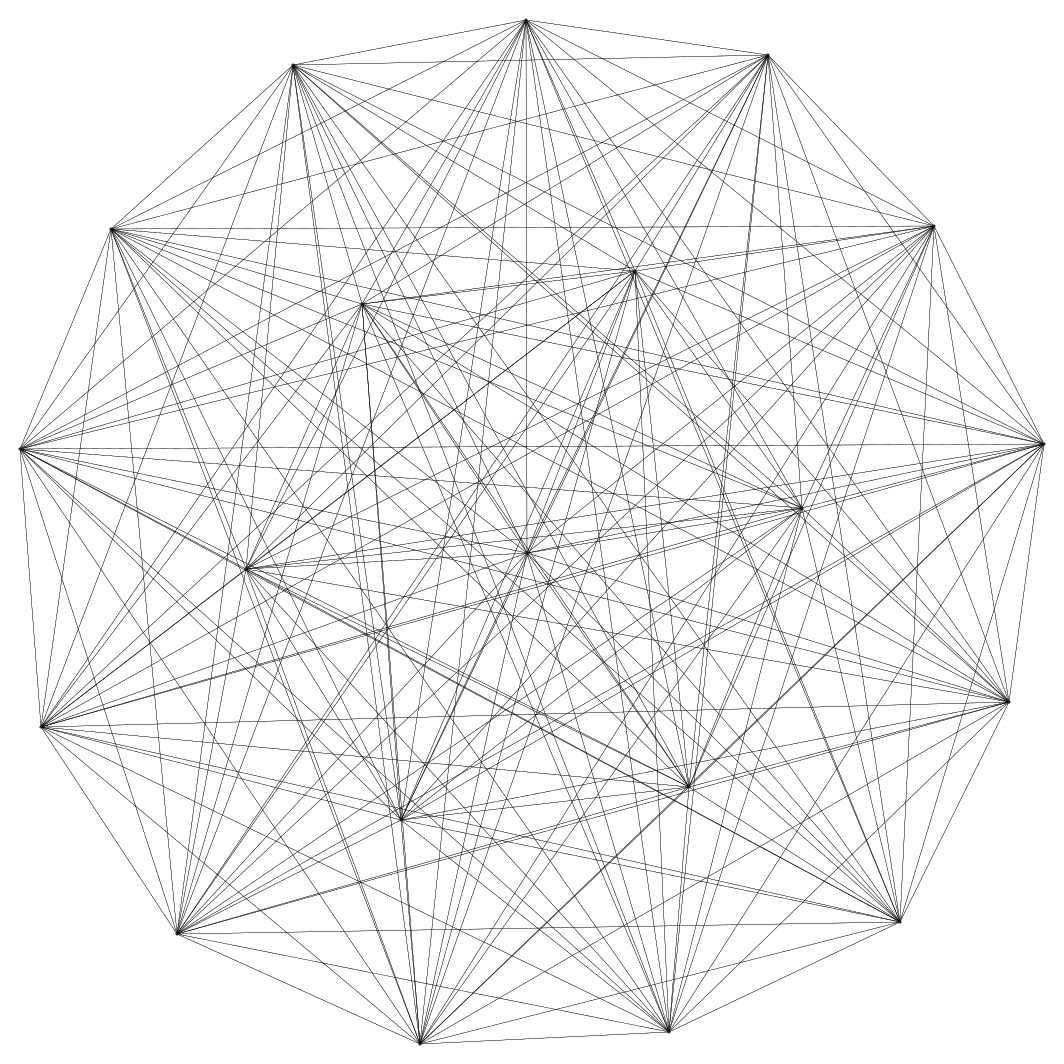

In [13]:
draw_graph(G_conn, edge_width=0.3) 

['@kmg3445t' '@code_kunst' '@highgrnd' ... '@heyamine' '@jypetwices'
 '@tuanxcocojaybno']


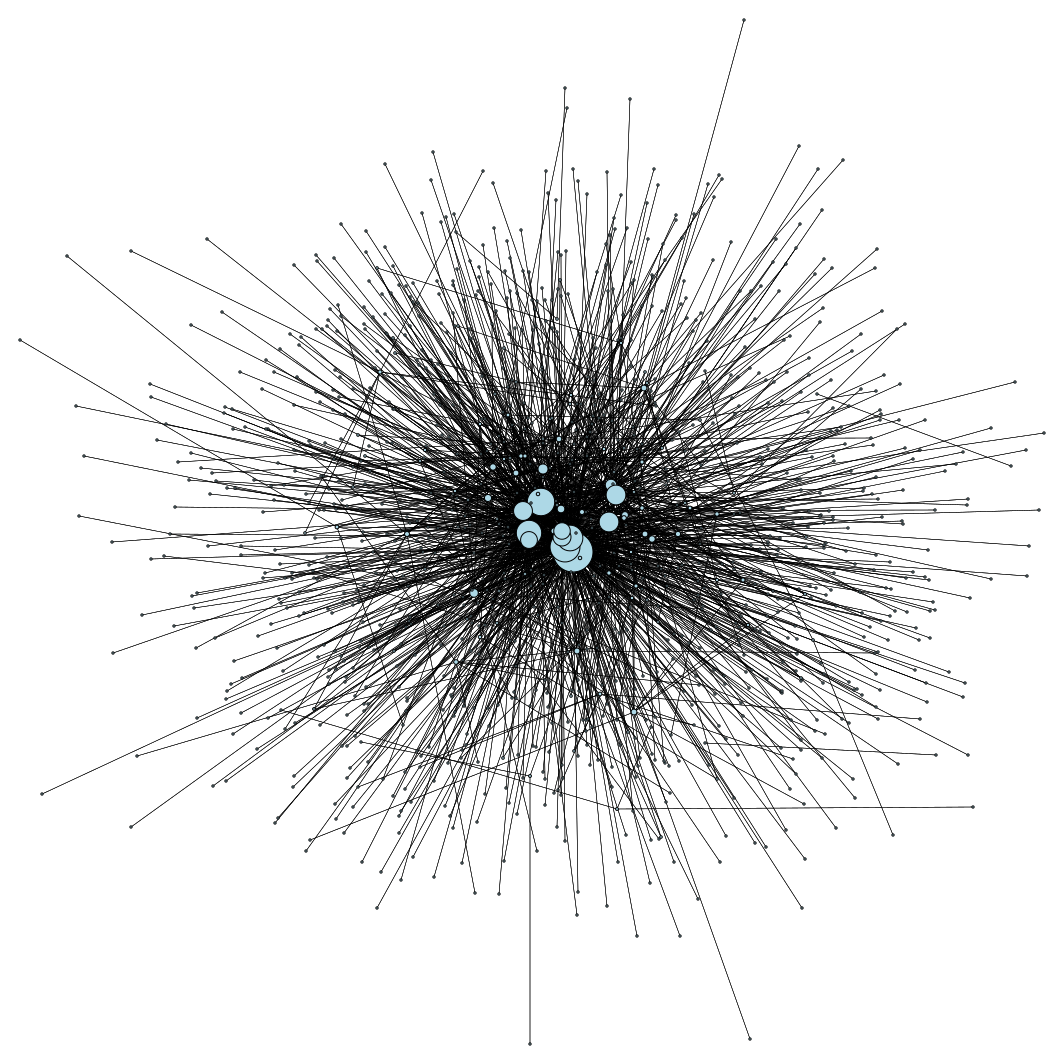

In [14]:
draw_graph(G, node_size=1, show_names=False) 

['@enhypen' '@_weeekly' '@88rising' '@jaybumaom' '@wei__official'
 '@officialhyolyn_' '@bts_bighit' '@bambam1a' '@_iuofficial' '@g_i_dle'
 '@rbw_mamamoo' '@txt_members' '@tidal' '@shxx131bi131' '@leehi_hi'
 '@kchartsmaster' '@yginnercircle' '@haroobomkum' '@blobyblo'
 '@jeff__benjamin' '@thinktwicekpop' '@applemusic' '@miyaohyeah'
 '@spotifykr' '@weareoneexo' '@realfromis_9' '@yerinbaek' '@astro_staff'
 '@enhypen_members' '@twicetly' '@bts_twt' '@dprian_' '@ddalgitokki29'
 '@c_woodzofficial' '@jp_dreamcatcher' '@blackpinkoffici' '@twiceustan'
 '@spotifykrspotif' '@itzyofficial' '@applemusicbrook' '@mostrequestlive'
 '@shazam' '@halsey' '@arcadepang' '@girlsgeneration' '@stray_kids'
 '@iheartradioaska' '@official_sunmi_' '@ygselect' '@ericnamofficial'
 '@krungy21' '@chungha_mnhent' '@misayeon' '@jypetwice' '@satgotloco'
 '@blackpink' '@bubblesmumblesd' '@official_yoon_' '@cube_ptg' '@zanelowe'
 '@bighitent' '@ygofficialblink' '@coldplaybts_twt' '@urbanzakapaabys'
 '@spotify' '@yg_ikonic

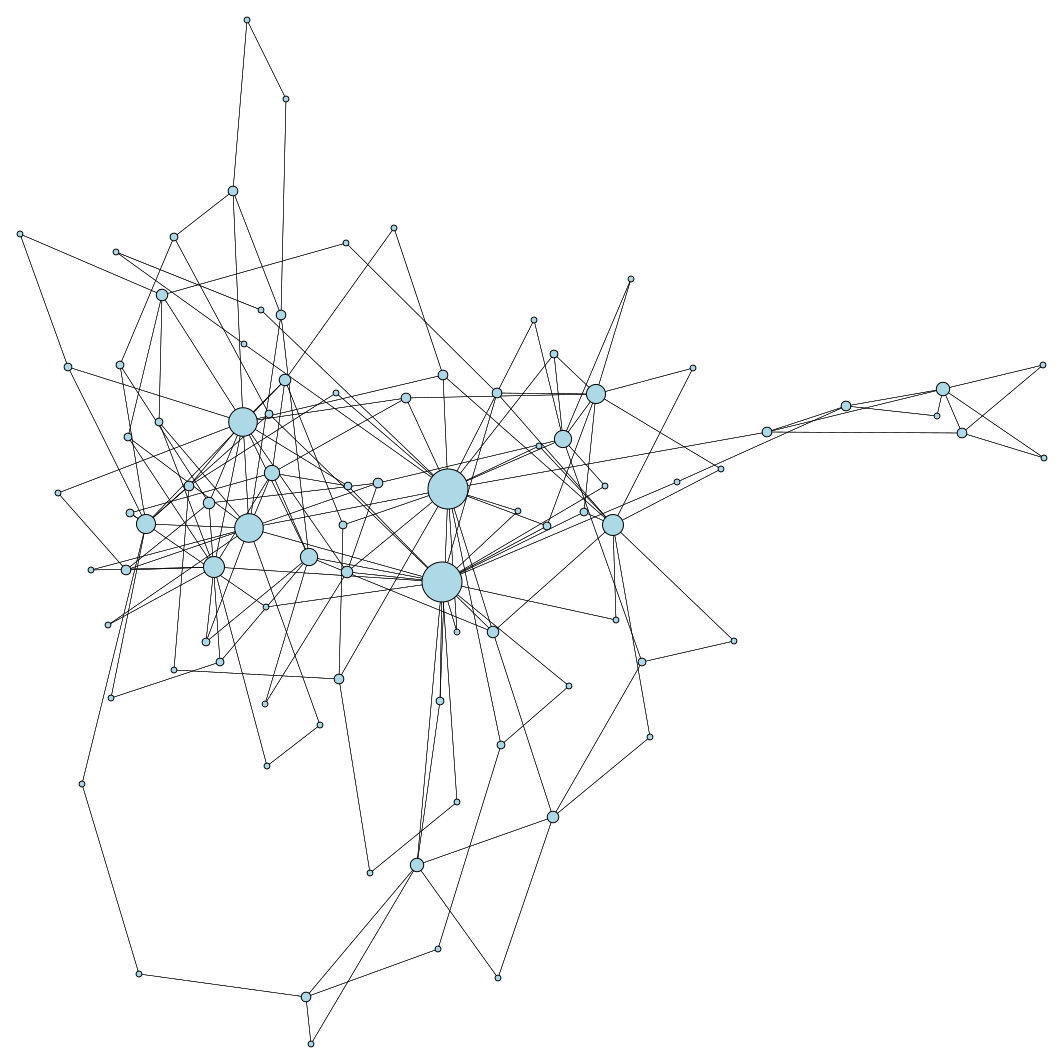

In [15]:
draw_graph(nx.k_core(G, 2), node_size=1, show_names=False) 

# important nodes

In [16]:
degrees = dict(nx.degree(G)) 

degrees

{'@kmg3445t': 1,
 '@code_kunst': 13,
 '@highgrnd': 1,
 '@youngjay_93': 1,
 '@sobeompark': 1,
 '@justhiseung': 1,
 '@hwajilla': 1,
 '@blobyblo': 4,
 '@minddonyy': 1,
 '@iuiive': 1,
 '@wgyenny': 1,
 '@wondergirls': 2,
 '@wg_lim': 2,
 '@eugenius887': 1,
 '@tukutz81': 1,
 '@krungy21': 2,
 '@haroobomkum': 86,
 '@ericjracy': 1,
 '@nolza_xxi': 1,
 '@ryubae21': 1,
 '@rebellebomzi': 1,
 '@gyulokpocjinhwa': 1,
 '@seungrisoio': 1,
 '@made_for_tttops': 1,
 '@clprv': 1,
 '@twinkle_tisa': 1,
 '@haroodidi': 1,
 '@jjy82_stop': 1,
 '@nokiov': 1,
 '@kristinekwaknok': 1,
 '@mm_3058': 1,
 '@2ne1_chisanokio': 1,
 '@izumingkki21': 1,
 '@moongyuri': 1,
 '@dyana_norazam': 1,
 '@maaa21too': 1,
 '@wereuniq': 1,
 '@bb21konnerakhi': 1,
 '@dindaacchan': 1,
 '@bomswife': 1,
 '@bomshiatus': 1,
 '@ftsuhyunouijakn': 1,
 '@harooharoobomou': 1,
 '@ddragon2ne1ouij': 1,
 '@arab_bombshells': 1,
 '@boming_21': 1,
 '@dc2ne1': 1,
 '@nicklim678': 1,
 '@2ne1kh': 1,
 '@jykim2505': 1,
 '@taempress': 1,
 '@oneofkindxi': 1,
 '@onei

In [17]:
degree_df = pd.DataFrame(degrees, index=[0]).T 
degree_df.columns = ['degrees'] 
degree_df.sort_values('degrees', inplace=True, ascending=False) 
degree_df.head() 

,degrees
@b_hundred_hyun,128
@zanelowe,94
@haroobomkum,86
@spotifykr,80
@itzailee,79


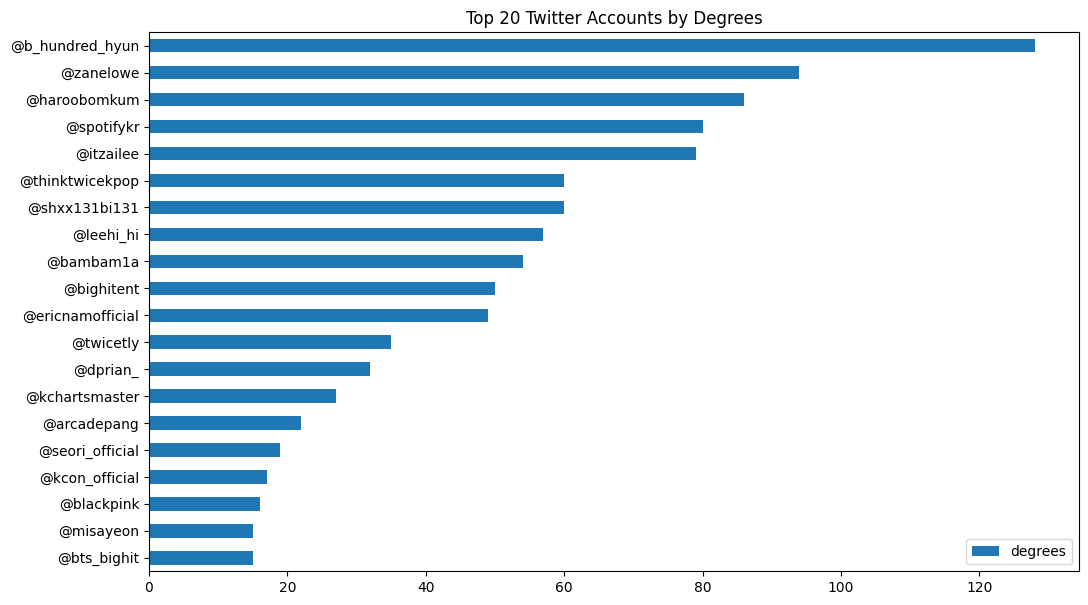

In [18]:
import matplotlib.pyplot as plt 

title = 'Top 20 Twitter Accounts by Degrees' 

_= degree_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [19]:
degcent = nx.degree_centrality(G) 

degcent 

{'@kmg3445t': 0.0008605851979345956,
 '@code_kunst': 0.011187607573149742,
 '@highgrnd': 0.0008605851979345956,
 '@youngjay_93': 0.0008605851979345956,
 '@sobeompark': 0.0008605851979345956,
 '@justhiseung': 0.0008605851979345956,
 '@hwajilla': 0.0008605851979345956,
 '@blobyblo': 0.0034423407917383822,
 '@minddonyy': 0.0008605851979345956,
 '@iuiive': 0.0008605851979345956,
 '@wgyenny': 0.0008605851979345956,
 '@wondergirls': 0.0017211703958691911,
 '@wg_lim': 0.0017211703958691911,
 '@eugenius887': 0.0008605851979345956,
 '@tukutz81': 0.0008605851979345956,
 '@krungy21': 0.0017211703958691911,
 '@haroobomkum': 0.07401032702237521,
 '@ericjracy': 0.0008605851979345956,
 '@nolza_xxi': 0.0008605851979345956,
 '@ryubae21': 0.0008605851979345956,
 '@rebellebomzi': 0.0008605851979345956,
 '@gyulokpocjinhwa': 0.0008605851979345956,
 '@seungrisoio': 0.0008605851979345956,
 '@made_for_tttops': 0.0008605851979345956,
 '@clprv': 0.0008605851979345956,
 '@twinkle_tisa': 0.0008605851979345956,
 '

In [20]:
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head() 

,degree_centrality
@b_hundred_hyun,0.110155
@zanelowe,0.080895
@haroobomkum,0.074010
@spotifykr,0.068847
@itzailee,0.067986


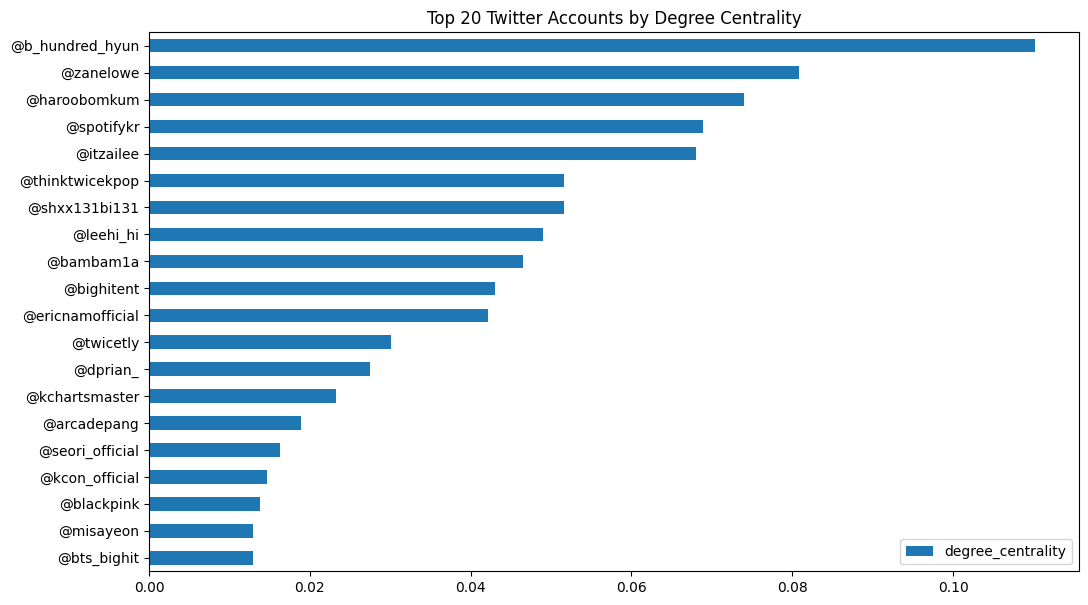

In [21]:
title = 'Top 20 Twitter Accounts by Degree Centrality' 

_= degcent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [22]:
betwcent = nx.betweenness_centrality(G) 

betwcent 

{'@kmg3445t': 0.0,
 '@code_kunst': 0.016037572215773392,
 '@highgrnd': 0.0,
 '@youngjay_93': 0.0,
 '@sobeompark': 0.0,
 '@justhiseung': 0.0,
 '@hwajilla': 0.0,
 '@blobyblo': 0.02836579219003866,
 '@minddonyy': 0.0,
 '@iuiive': 0.0,
 '@wgyenny': 0.0,
 '@wondergirls': 0.0013446180439736057,
 '@wg_lim': 0.0026862711087984274,
 '@eugenius887': 0.0,
 '@tukutz81': 0.0,
 '@krungy21': 0.022526397845298824,
 '@haroobomkum': 0.12178879004965242,
 '@ericjracy': 0.0,
 '@nolza_xxi': 0.0,
 '@ryubae21': 0.0,
 '@rebellebomzi': 0.0,
 '@gyulokpocjinhwa': 0.0,
 '@seungrisoio': 0.0,
 '@made_for_tttops': 0.0,
 '@clprv': 0.0,
 '@twinkle_tisa': 0.0,
 '@haroodidi': 0.0,
 '@jjy82_stop': 0.0,
 '@nokiov': 0.0,
 '@kristinekwaknok': 0.0,
 '@mm_3058': 0.0,
 '@2ne1_chisanokio': 0.0,
 '@izumingkki21': 0.0,
 '@moongyuri': 0.0,
 '@dyana_norazam': 0.0,
 '@maaa21too': 0.0,
 '@wereuniq': 0.0,
 '@bb21konnerakhi': 0.0,
 '@dindaacchan': 0.0,
 '@bomswife': 0.0,
 '@bomshiatus': 0.0,
 '@ftsuhyunouijakn': 0.0,
 '@harooharoobomou

In [23]:
betwcent_df = pd.DataFrame(betwcent, index=[0]).T 
betwcent_df.columns = ['betweenness_centrality'] 
betwcent_df.sort_values('betweenness_centrality', inplace=True, ascending=False) 
betwcent_df.head() 

,betweenness_centrality
@youtube,0.193090
@spotifykr,0.175619
@kchartsmaster,0.167481
@blackpink,0.125805
@haroobomkum,0.121789


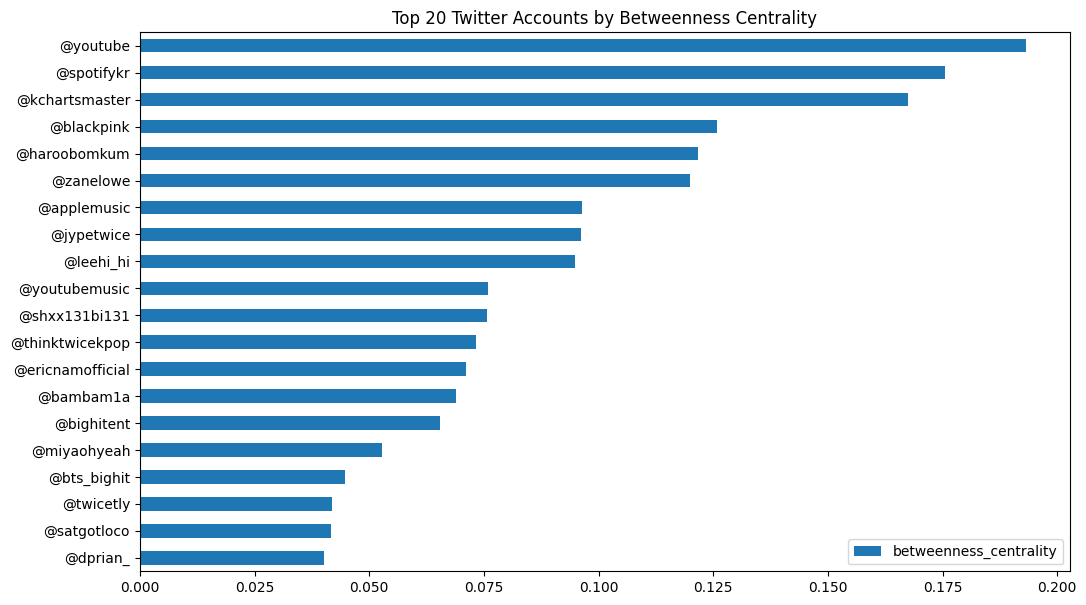

In [24]:
title = 'Top 20 Twitter Accounts by Betweenness Centrality' 

_= betwcent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [25]:
closecent = nx.closeness_centrality(G) 

closecent 

{'@kmg3445t': 0.12710883458078617,
 '@code_kunst': 0.15176930794223495,
 '@highgrnd': 0.12710883458078617,
 '@youngjay_93': 0.12710883458078617,
 '@sobeompark': 0.12710883458078617,
 '@justhiseung': 0.12710883458078617,
 '@hwajilla': 0.12710883458078617,
 '@blobyblo': 0.18711010406907921,
 '@minddonyy': 0.12710883458078617,
 '@iuiive': 0.12710883458078617,
 '@wgyenny': 0.07940034854856182,
 '@wondergirls': 0.08836984862746897,
 '@wg_lim': 0.09959594534390066,
 '@eugenius887': 0.12710883458078617,
 '@tukutz81': 0.12710883458078617,
 '@krungy21': 0.1694177446585359,
 '@haroobomkum': 0.19747328545225393,
 '@ericjracy': 0.1576714476955441,
 '@nolza_xxi': 0.1576714476955441,
 '@ryubae21': 0.1576714476955441,
 '@rebellebomzi': 0.1576714476955441,
 '@gyulokpocjinhwa': 0.1576714476955441,
 '@seungrisoio': 0.1576714476955441,
 '@made_for_tttops': 0.1576714476955441,
 '@clprv': 0.1576714476955441,
 '@twinkle_tisa': 0.1576714476955441,
 '@haroodidi': 0.1576714476955441,
 '@jjy82_stop': 0.15767144

In [26]:
closecent_df = pd.DataFrame(closecent, index=[0]).T 
closecent_df.columns = ['closeness_centrality'] 
closecent_df.sort_values('closeness_centrality', inplace=True, ascending=False) 
closecent_df.head() 

,closeness_centrality
@blackpink,0.247134
@youtube,0.238254
@kchartsmaster,0.230364
@spotifykr,0.229991
@leehi_hi,0.222560


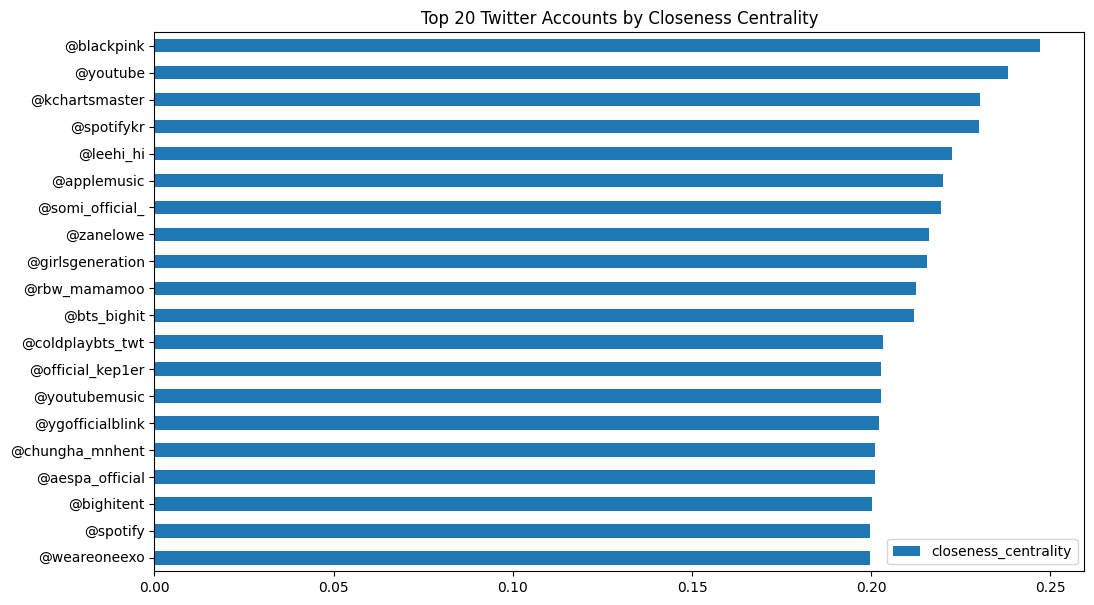

In [27]:
title = 'Top 20 Twitter Accounts by Closeness Centrality' 

_= closecent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [28]:
pagerank = nx.pagerank(G) 

pagerank 

{'@kmg3445t': 0.00047123124840596525,
 '@code_kunst': 0.005226313735064201,
 '@highgrnd': 0.00047123124840596525,
 '@youngjay_93': 0.00047123124840596525,
 '@sobeompark': 0.00047123124840596525,
 '@justhiseung': 0.00047123124840596525,
 '@hwajilla': 0.00047123124840596525,
 '@blobyblo': 0.0014007295303692594,
 '@minddonyy': 0.00047123124840596525,
 '@iuiive': 0.00047123124840596525,
 '@wgyenny': 0.000537226620562695,
 '@wondergirls': 0.0009602692809902633,
 '@wg_lim': 0.0008821436492944235,
 '@eugenius887': 0.00047123124840596525,
 '@tukutz81': 0.00047123124840596525,
 '@krungy21': 0.000789539023636247,
 '@haroobomkum': 0.03374180216354001,
 '@ericjracy': 0.00046314977962107727,
 '@nolza_xxi': 0.00046314977962107727,
 '@ryubae21': 0.00046314977962107727,
 '@rebellebomzi': 0.00046314977962107727,
 '@gyulokpocjinhwa': 0.00046314977962107727,
 '@seungrisoio': 0.00046314977962107727,
 '@made_for_tttops': 0.00046314977962107727,
 '@clprv': 0.00046314977962107727,
 '@twinkle_tisa': 0.0004631

In [29]:
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False) 
pagerank_df.head() 

,pagerank
@b_hundred_hyun,0.050979
@zanelowe,0.036025
@haroobomkum,0.033742
@itzailee,0.031641
@spotifykr,0.026531


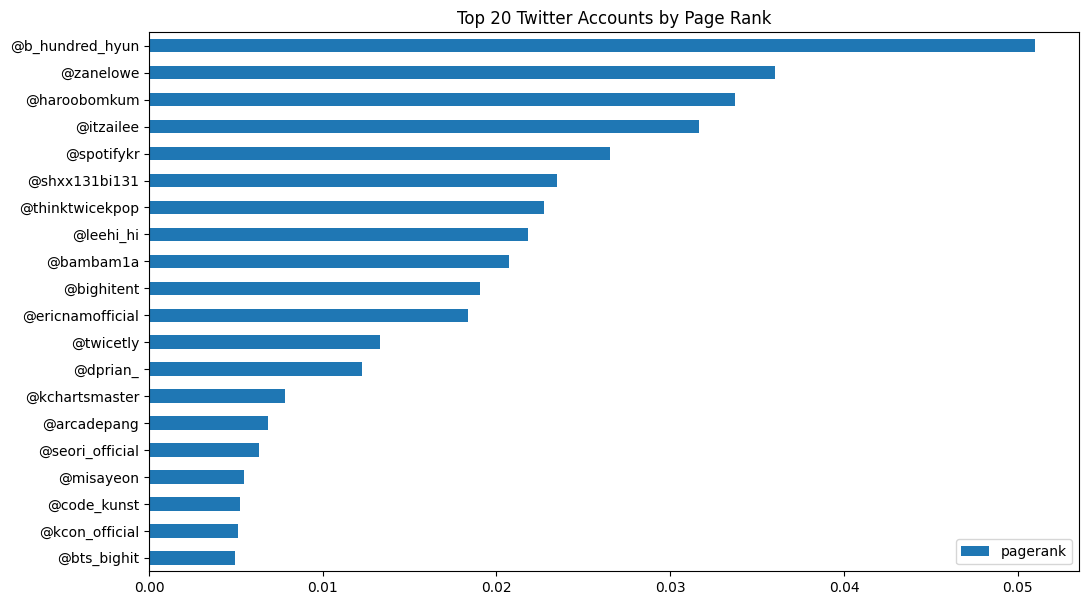

In [30]:
title = 'Top 20 Twitter Accounts by Page Rank' 

_= pagerank_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

# comparing centralities

In [31]:
combined_importance_df = pd.concat([degree_df, degcent_df, betwcent_df, closecent_df, pagerank_df], axis=1) 

combined_importance_df.head(10) 

,degrees,degree_centrality,betweenness_centrality,closeness_centrality,pagerank
@b_hundred_hyun,128,0.110155,0.012050,0.110155,0.050979
@zanelowe,94,0.080895,0.119831,0.216054,0.036025
@haroobomkum,86,0.074010,0.121789,0.197473,0.033742
@spotifykr,80,0.068847,0.175619,0.229991,0.026531
@itzailee,79,0.067986,0.004568,0.067986,0.031641
@thinktwicekpop,60,0.051635,0.073378,0.162288,0.022711
@shxx131bi131,60,0.051635,0.075669,0.165467,0.023469
@leehi_hi,57,0.049053,0.094873,0.222560,0.021838
@bambam1a,54,0.046472,0.068909,0.173223,0.020710
@bighitent,50,0.043029,0.065514,0.200317,0.019042


In [32]:
combined_importance_df.sort_values('pagerank', ascending=False)[0:10] 

,degrees,degree_centrality,betweenness_centrality,closeness_centrality,pagerank
@b_hundred_hyun,128,0.110155,0.012050,0.110155,0.050979
@zanelowe,94,0.080895,0.119831,0.216054,0.036025
@haroobomkum,86,0.074010,0.121789,0.197473,0.033742
@itzailee,79,0.067986,0.004568,0.067986,0.031641
@spotifykr,80,0.068847,0.175619,0.229991,0.026531
@shxx131bi131,60,0.051635,0.075669,0.165467,0.023469
@thinktwicekpop,60,0.051635,0.073378,0.162288,0.022711
@leehi_hi,57,0.049053,0.094873,0.222560,0.021838
@bambam1a,54,0.046472,0.068909,0.173223,0.020710
@bighitent,50,0.043029,0.065514,0.200317,0.019042


# visualizing subgraphs

In [33]:
subgraph_nodes = pagerank_df[0:100].index.to_list() 

subgraph_nodes 

['@b_hundred_hyun',
 '@zanelowe',
 '@haroobomkum',
 '@itzailee',
 '@spotifykr',
 '@shxx131bi131',
 '@thinktwicekpop',
 '@leehi_hi',
 '@bambam1a',
 '@bighitent',
 '@ericnamofficial',
 '@twicetly',
 '@dprian_',
 '@kchartsmaster',
 '@arcadepang',
 '@seori_official',
 '@misayeon',
 '@code_kunst',
 '@kcon_official',
 '@bts_bighit',
 '@yubinofficial',
 '@bts_twt',
 '@miyaohyeah',
 '@blackpink',
 '@satgotloco',
 '@niziu__official',
 '@cube_ptg',
 '@applemusic',
 '@somi_official_',
 '@pledis_17',
 '@jp_dreamcatcher',
 '@got7official',
 '@shinsfriends',
 '@youtube',
 '@weareoneexo',
 '@ygofficialblink',
 '@bvndit_official',
 '@5redvelvet',
 '@yerinbaek',
 '@kpopggsuperior',
 '@official_yoon_',
 '@jaybumaom',
 '@itzyofficial',
 '@ljh__official',
 '@yginnercircle',
 '@spotify',
 '@enhypen',
 '@wjsn_cosmic',
 '@girlsgeneration',
 '@txt_members',
 '@heize_official',
 '@cubeclc',
 '@shfly3424',
 '@ab6ix',
 '@stray_kids',
 '@rbw_mamamoo',
 '@blobyblo',
 '@ateezofficial',
 '@jypetwice',
 '@rvsmtown',


In [34]:
G_sub = G.subgraph(subgraph_nodes) 

['@enhypen' '@jaybumaom' '@code_kunst' '@bts_bighit' '@5redvelvet'
 '@bvndit_official' '@itzailee' '@bambam1a' '@wannaone_twt' '@rbw_mamamoo'
 '@txt_members' '@tidal' '@officiallaboum' '@shxx131bi131' '@leehi_hi'
 '@kchartsmaster' '@yginnercircle' '@haroobomkum' '@ljh__official'
 '@blobyblo' '@thinktwicekpop' '@applemusic' '@spotifykr' '@miyaohyeah'
 '@exidofficial' '@into__universe' '@weareoneexo' '@wg_lim'
 '@elris_official' '@realfromis_9' '@pledis_17' '@yerinbaek' '@shfly3424'
 '@shofarmusic' '@twicetly' '@cubeclc' '@bts_twt' '@wjsn_cosmic'
 '@dprian_' '@hunus_elris' '@ddalgitokki29' '@b_hundred_hyun' '@tiktokkr'
 '@yubinofficial' '@jp_dreamcatcher' '@9muses_' '@twiceustan'
 '@spotifykrspotif' '@itzyofficial' '@applemusicbrook' '@official_truz'
 '@shazam' '@halsey' '@arcadepang' '@girlsgeneration' '@day6official'
 '@stray_kids' '@ygselect' '@ericnamofficial' '@chungha_mnhent'
 '@krungy21' '@misayeon' '@itsmoonsujin' '@jypetwice' '@satgotloco'
 '@blackpink' '@bol4_official' '@cube_p

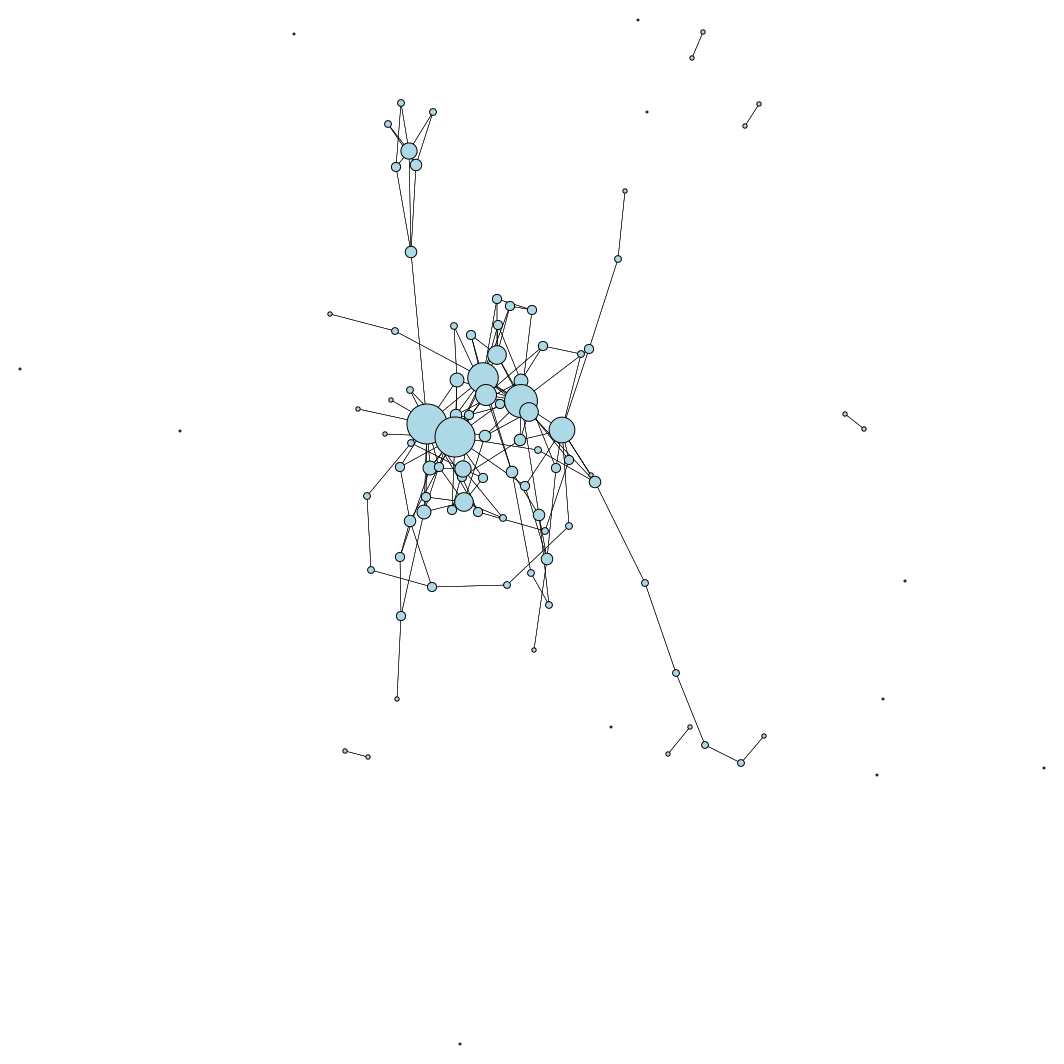

In [35]:
draw_graph(G_sub, node_size=3) 

# connected components

In [36]:
components = list(nx.connected_components(G)) 

len(components) 

15

In [37]:
for i in range(len(components)): 

    component_node_count = len(components[i]) 

    print('component {}: {}'.format(i, component_node_count)) 

component 0: 909
component 1: 2
component 2: 3
component 3: 4
component 4: 2
component 5: 2
component 6: 80
component 7: 129
component 8: 3
component 9: 7
component 10: 4
component 11: 4
component 12: 2
component 13: 10
component 14: 2


In [38]:
def draw_component(G, component, node_size=3, show_names=True): 

    check_component = components[component] 

    G_check = G.subgraph(check_component) 

    return draw_graph(G_check, show_names=show_names, node_size=node_size) 

['@justmars13ellae' '@mansurgavriel' '@gotailee' '@insaneilenstar_'
 '@woonma0038insan' '@ilee1ove_2' '@itzailee' '@kpopidolvote' '@star_330_'
 '@dldpwlschlrhdis' '@engr_dianne_dga' '@amy890530ailees'
 '@aileean_garden' '@biennnee' '@youngji_02' '@insaneilenlance'
 '@itzezey93' '@amy890530aileea' '@engr_dianne_dge' '@aileeany'
 '@ysmd_mmd' '@blushycotton' '@memoklwstar_330' '@kimblue_37pubg_'
 '@star_330_woonma' '@aileeanchary' '@amy890530tzzhw1' '@happy_aileean'
 '@hl___s2' '@amy890530woonma' '@ailee_luvu' '@arabaileeanbagy'
 '@ellaeean_thel1v' '@amy890530insane' '@amy890530' '@jamjari_pr'
 '@memoklw' '@running09905458' '@woonma0038' '@jlemon_a'
 '@fladioaileeans9' '@insaneilen' '@ailee_cheogajip' '@cherries4ailee'
 '@ellaeeanjustmar' '@insaneilenamy89' '@arabaileeanwhee' '@aileeflwr'
 '@arabaileean' '@woonma0038amy89' '@kimhany22' '@never_wrath'
 '@kkaljjakjd' '@ellaeean_' '@star_330_amy890' '@ravithecrackkid'
 '@amy890530dldpwl' '@lienaileeans' '@aileeluna27meki' '@woonma0038ilee1'


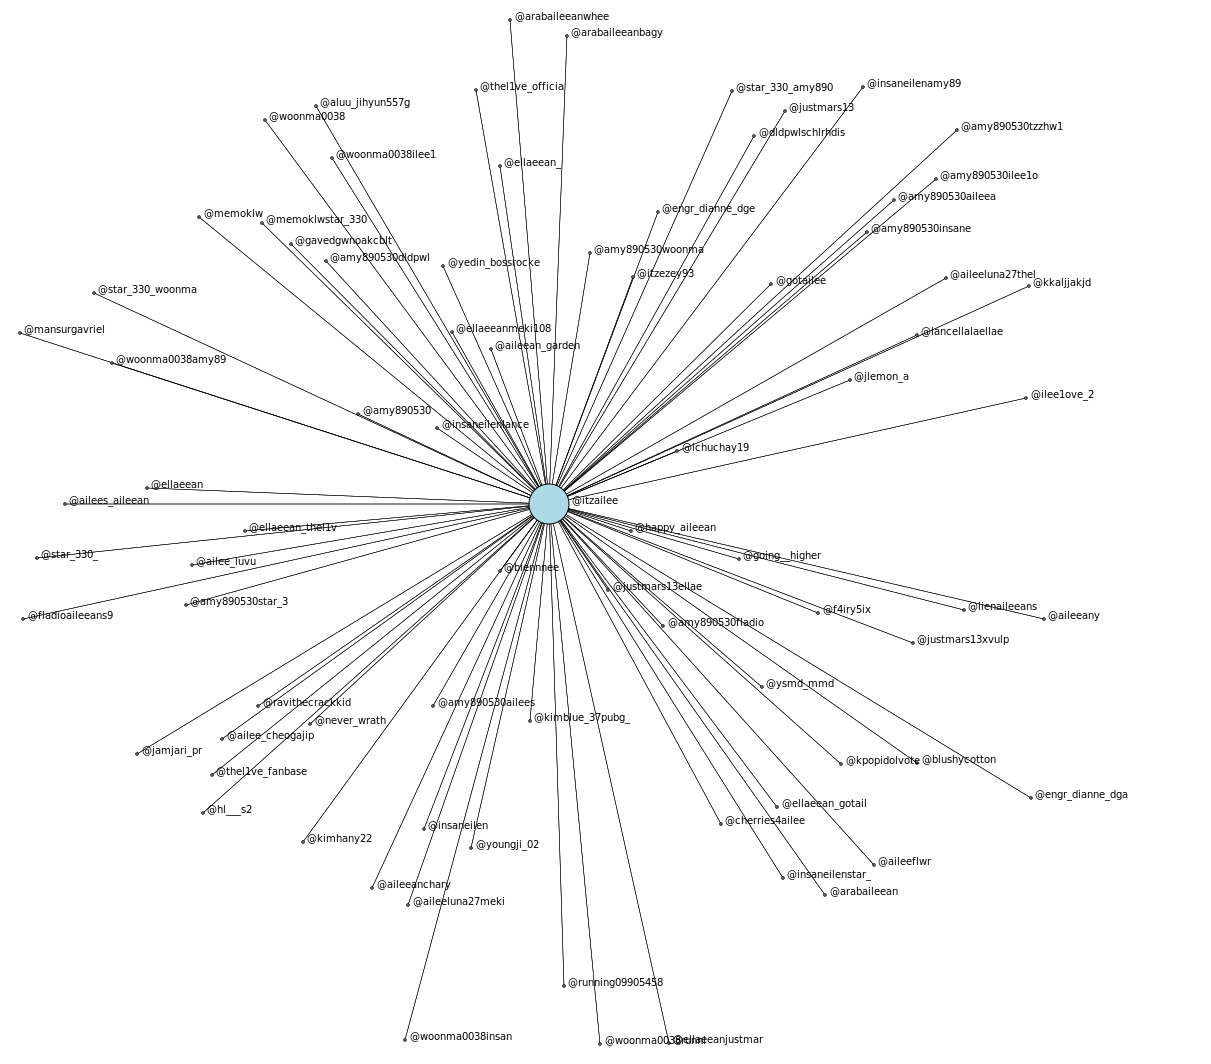

In [39]:
draw_component(G, component=6, node_size=5) 

['@kmg3445t' '@code_kunst' '@highgrnd' '@youngjay_93' '@sobeompark'
 '@justhiseung' '@hwajilla' '@blobyblo' '@minddonyy' '@iuiive' '@wgyenny'
 '@wondergirls' '@wg_lim' '@eugenius887' '@tukutz81' '@krungy21'
 '@haroobomkum' '@ericjracy' '@nolza_xxi' '@ryubae21' '@rebellebomzi'
 '@gyulokpocjinhwa' '@seungrisoio' '@made_for_tttops' '@clprv'
 '@twinkle_tisa' '@haroodidi' '@jjy82_stop' '@nokiov' '@kristinekwaknok'
 '@mm_3058' '@2ne1_chisanokio' '@izumingkki21' '@moongyuri'
 '@dyana_norazam' '@maaa21too' '@wereuniq' '@bb21konnerakhi'
 '@dindaacchan' '@bomswife' '@bomshiatus' '@ftsuhyunouijakn'
 '@harooharoobomou' '@ddragon2ne1ouij' '@arab_bombshells' '@boming_21'
 '@dc2ne1' '@nicklim678' '@2ne1kh' '@jykim2505' '@taempress'
 '@oneofkindxi' '@onei' '@letterstobom' '@madsunggyu' '@parkbomdaily'
 '@mrstinamacias' '@cheshirekard' '@chibidestroyer' '@ayumu_winter'
 '@sasaengforyeol' '@wildgzbom' '@nokiovnolza_xxi' '@_iish21' '@ringoesp'
 '@stobitoppa' '@itslittlejelly' '@luanaferreiragu' '@mikia_b

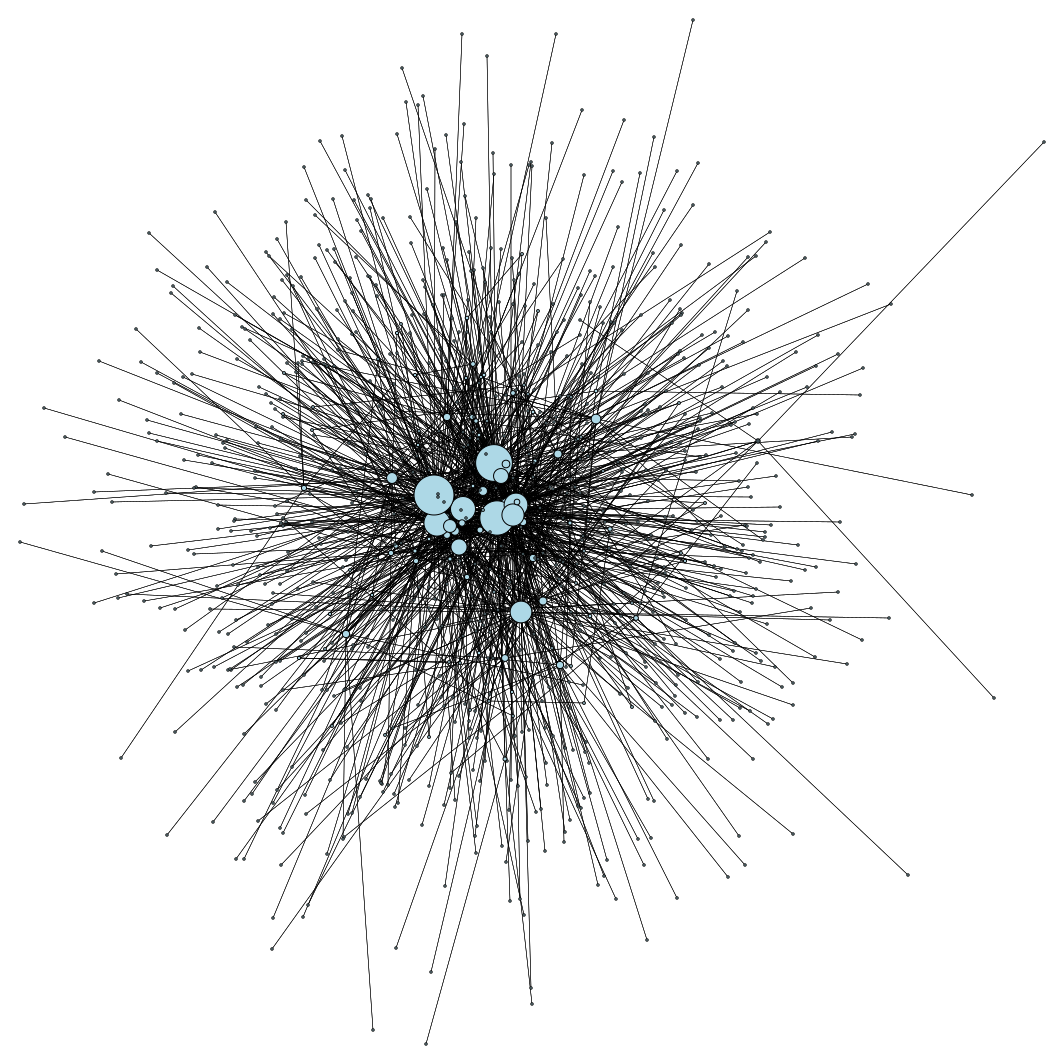

In [40]:
draw_component(G, 0, show_names=False, node_size=2) 

# communities

In [41]:
%pip install community
%pip install python-louvain

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [42]:
import community as community
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [43]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 

    cmap = cm.get_cmap('flag', max(partition.values()) + 1) 
    
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

In [46]:
partition = community.best_partition(G, resolution=2)

C:\Users\amird\AppData\Local\Temp\ipykernel_20980\4204481878.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('flag', max(partition.values()) + 1)


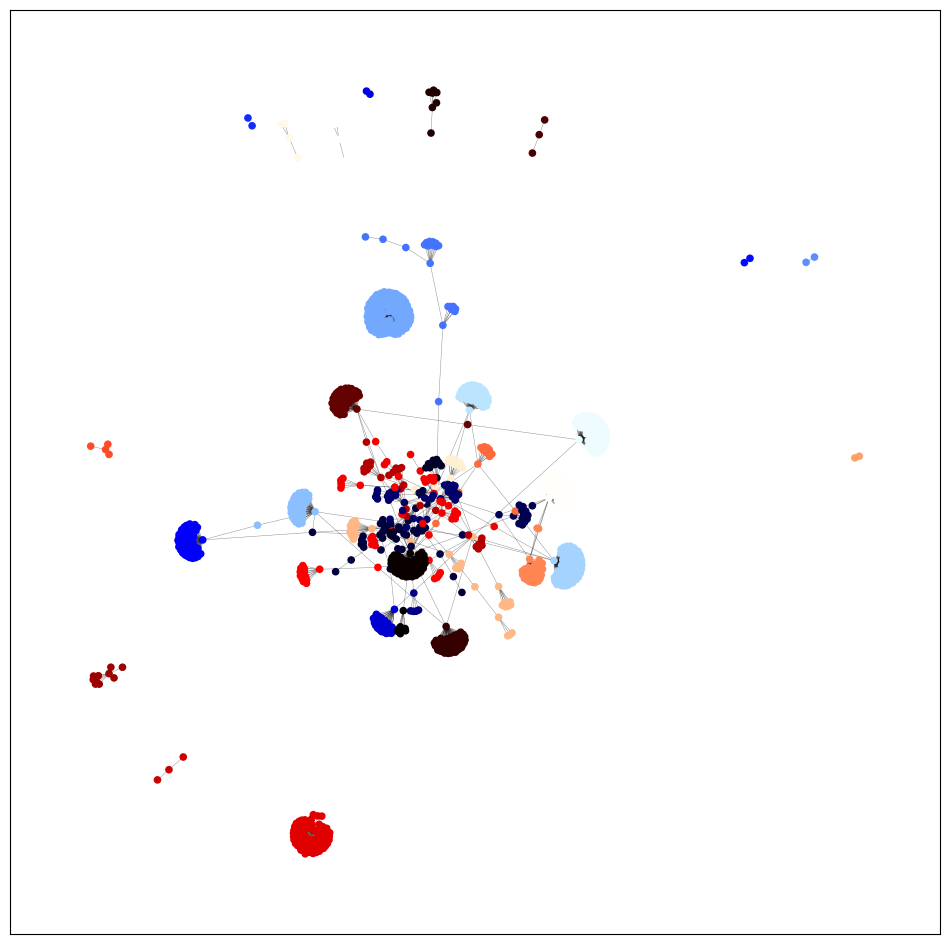

In [47]:
draw_partition(G, partition) 

In [48]:
community_df = pd.DataFrame(partition, index=[0]).T 
community_df.columns = ['community'] 
community_df.head() 

,community
@kmg3445t,0
@code_kunst,0
@highgrnd,0
@youngjay_93,0
@sobeompark,0


In [49]:
community_df['community'].value_counts() 

community
15    129
29     91
3      85
14     80
30     59
20     59
16     55
17     55
2      52
36     48
22     47
7      41
11     41
25     37
5      35
19     34
6      31
28     28
1      22
0      19
18     15
4      14
31     14
26     13
35     10
37      9
23      7
32      5
24      4
10      4
33      4
9       3
21      3
8       2
34      2
12      2
13      2
27      2
Name: count, dtype: int64

In [50]:
def get_community_nodes(commmunity_df, partition): 

    community_nodes = community_df[community_df['community']==partition].index.to_list() 

    return community_nodes 

In [51]:
def draw_community(G, community_df, partition, node_size=3, show_names=False): 

    community_nodes = get_community_nodes(community_df, partition) 

    G_community = G.subgraph(community_nodes) 

    return draw_graph(G_community, node_size=node_size, show_names=show_names) 

['@wg_limyubinoffi' '@nibuy_yub' '@youtubemusicgot' '@metrouk' '@wg_lim'
 '@got7officialsho' '@elcompanies_kr' '@wg_limrrrent_of' '@cvntvry'
 '@twittergot7offi' '@yubinofficialwg' '@got7officialbam'
 '@got7officialkhu' '@got7official' '@rrrent_official' '@yubinofficial'
 '@wgyenny' '@vliveofficial' '@rrrent_officiai' '@wondergirls'
 '@twittermusictwi' '@cosmokorea']


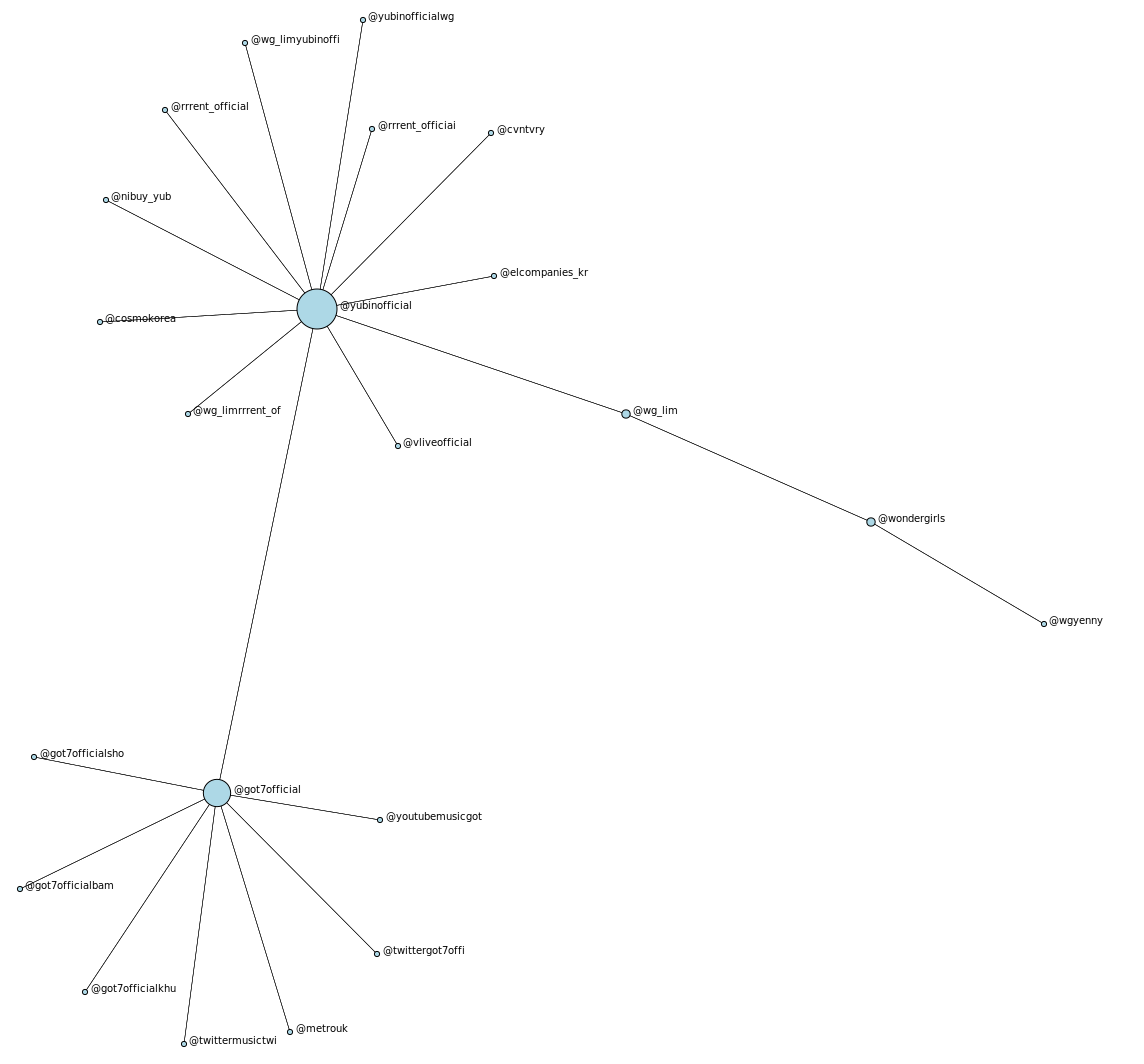

In [52]:
draw_community(G, community_df, 1, show_names=True) # draw community 1

# bridges

In [53]:
list(nx.bridges(G)) 

[('@kmg3445t', '@code_kunst'),
 ('@code_kunst', '@highgrnd'),
 ('@code_kunst', '@youngjay_93'),
 ('@code_kunst', '@sobeompark'),
 ('@code_kunst', '@justhiseung'),
 ('@code_kunst', '@hwajilla'),
 ('@code_kunst', '@blobyblo'),
 ('@code_kunst', '@minddonyy'),
 ('@code_kunst', '@iuiive'),
 ('@code_kunst', '@eugenius887'),
 ('@code_kunst', '@tukutz81'),
 ('@code_kunst', '@migoivtitunes'),
 ('@code_kunst', '@nucksal'),
 ('@wgyenny', '@wondergirls'),
 ('@wondergirls', '@wg_lim'),
 ('@wg_lim', '@yubinofficial'),
 ('@haroobomkum', '@ericjracy'),
 ('@haroobomkum', '@nolza_xxi'),
 ('@haroobomkum', '@ryubae21'),
 ('@haroobomkum', '@rebellebomzi'),
 ('@haroobomkum', '@gyulokpocjinhwa'),
 ('@haroobomkum', '@seungrisoio'),
 ('@haroobomkum', '@made_for_tttops'),
 ('@haroobomkum', '@clprv'),
 ('@haroobomkum', '@twinkle_tisa'),
 ('@haroobomkum', '@haroodidi'),
 ('@haroobomkum', '@jjy82_stop'),
 ('@haroobomkum', '@nokiov'),
 ('@haroobomkum', '@kristinekwaknok'),
 ('@haroobomkum', '@mm_3058'),
 ('@haroobo

In [ ]:
bridges = [s[0] for s in list(nx.bridges(G))] 

pd.Series(bridges).value_counts()[0:10] 

@b_hundred_hyun    127
@zanelowe           90
@haroobomkum        84
@itzailee           78
@spotifykr          60
@shxx131bi131       57
@leehi_hi           53
@thinktwicekpop     53
@bambam1a           49
@bighitent          46
Name: count, dtype: int64

In [ ]:
cut_bridges = pd.Series(bridges).value_counts()[0:10].index.to_list() 

G_bridge_cut = G.copy() 
G_bridge_cut.remove_nodes_from(cut_bridges) 

['@kmg3445t' '@code_kunst' '@highgrnd' ... '@heyamine' '@jypetwices'
 '@tuanxcocojaybno']


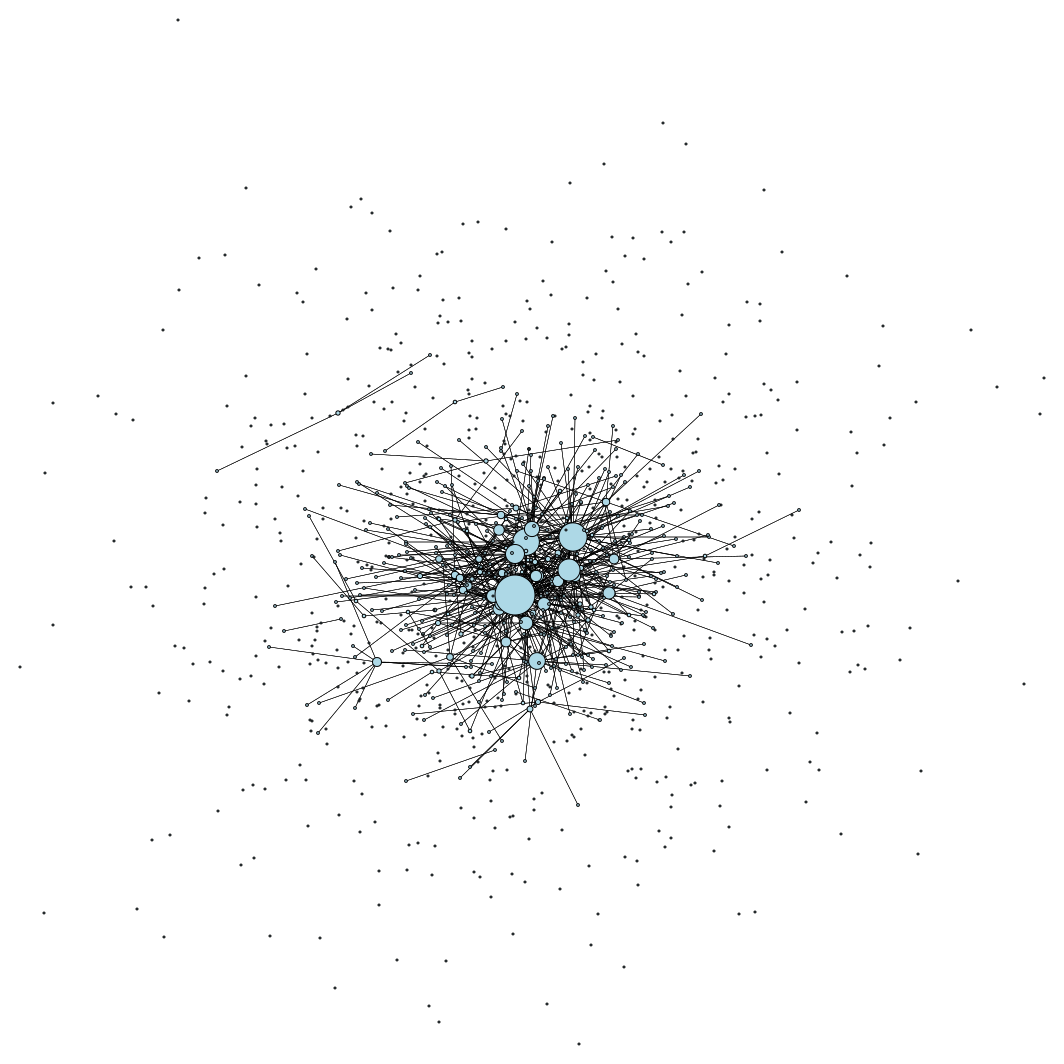

In [ ]:
draw_graph(G_bridge_cut, show_names=False) 

# layers: k-core and k-corona

In [ ]:
G_core = nx.k_core(G, 2) # k-core

['@shxx131bi131' '@ddalgitokki29' '@enhypen' '@applemusic'
 '@jeff__benjamin' '@iheartradio' '@zanelowe' '@spotifyspotifyk'
 '@ateezofficial' '@spotifykrspotif' '@urbanzakapaabys' '@itzyofficial'
 '@tidal' '@officialhyolyn_' '@_weeekly' '@youtubemusic'
 '@applemusicbrook' '@seori_official' '@bts_twtbts_bigh'
 '@mostrequestlive' '@88rising' '@krungy21' '@halsey' '@haroobomkum'
 '@miyaohyeah' '@shazam' '@bubblesmumblesd' '@official_kep1er'
 '@realfromis_9' '@youtube' '@coldplaybts_twt' '@wm_on7off'
 '@nctsmtown_dream' '@kchartsmaster' '@brookereeseappl' '@yginnercircle'
 '@jypetwicejypetw' '@ericnamofficial' '@yerinbaek' '@bts_twt'
 '@jaybumaom' '@blobyblo' '@rvsmtown' '@twicetly' '@somi_official_'
 '@spotify' '@_iuofficial' '@twiceustan' '@chungha_mnhent'
 '@blackpinkoffici' '@cube_ptg' '@__honey_j__' '@txt_members'
 '@arcadepang' '@g_i_dle' '@iheartradioaska' '@enhypen_members'
 '@astro_staff' '@rbw_mamamoo' '@satgotloco' '@aespa_official'
 '@justinbieber' '@dprian_' '@weareoneexo' '@t

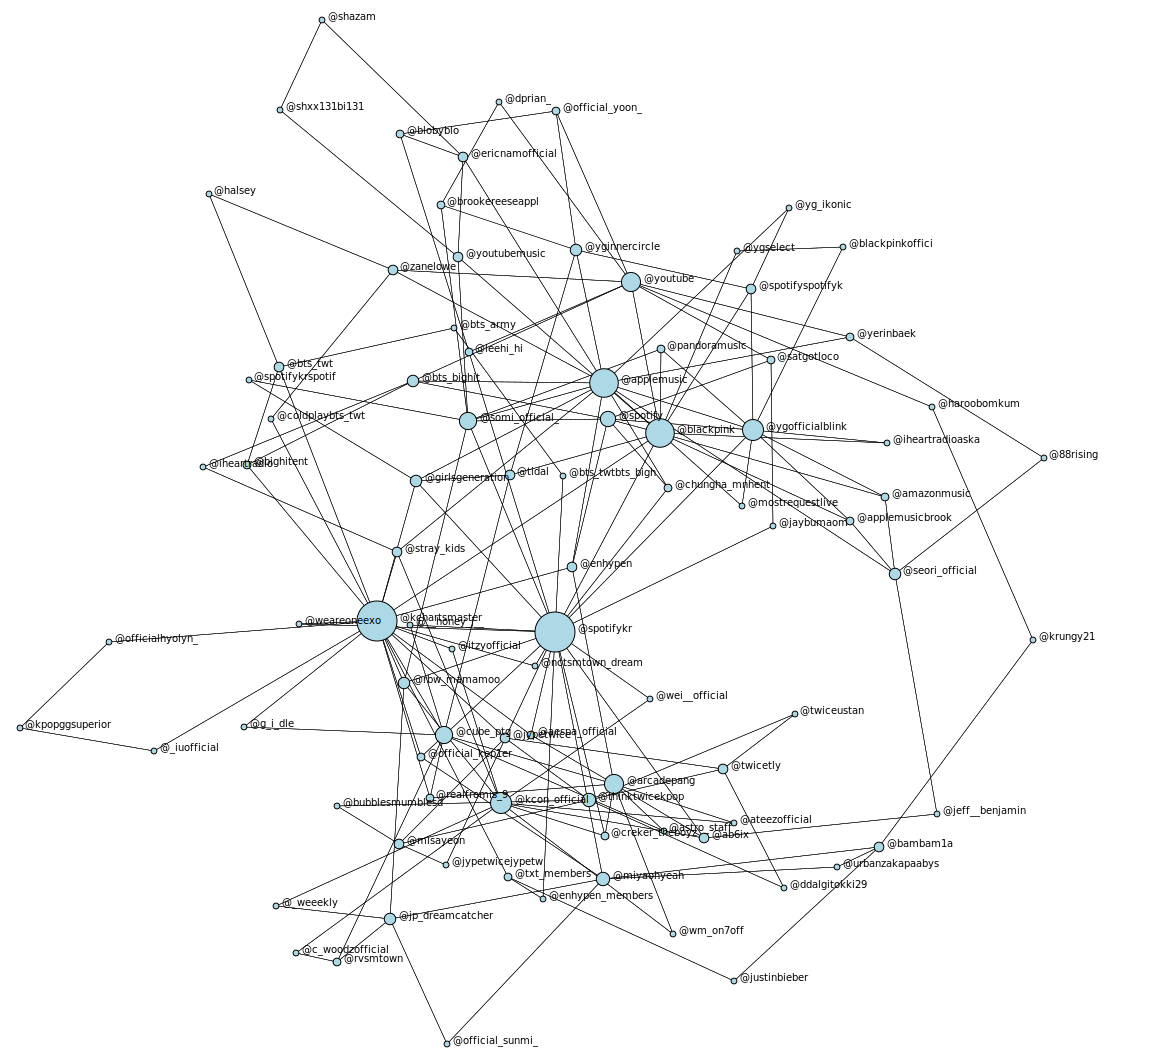

In [ ]:
draw_graph(G_core, show_names=True, node_size=3) 

In [ ]:
G_corona = nx.k_corona(G, 1) # k-corona

['@kmg3445t' '@highgrnd' '@youngjay_93' ... '@heyamine' '@jypetwices'
 '@tuanxcocojaybno']


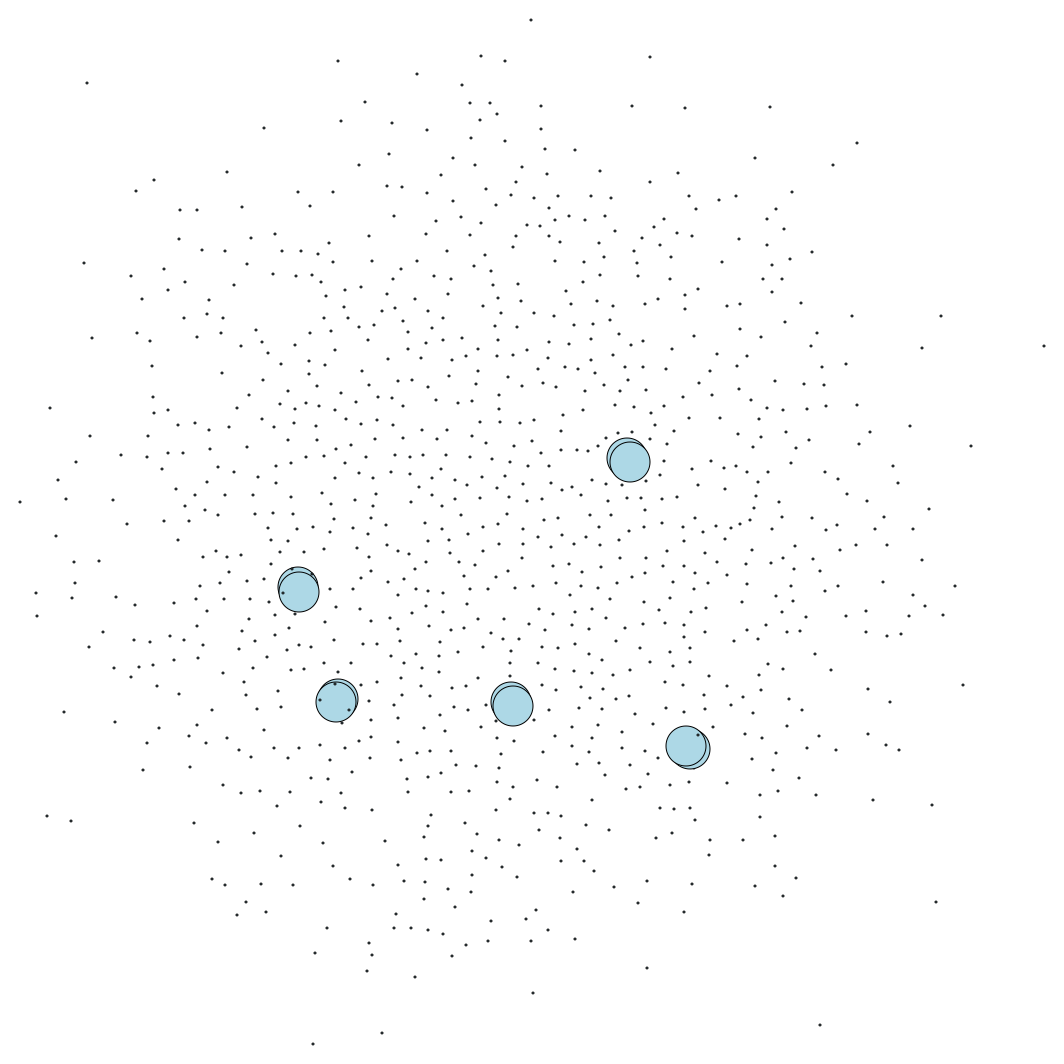

In [ ]:
draw_graph(G_corona, show_names=False, node_size=2) 

In [ ]:
G_corona = nx.k_corona(G, 1) 

G_corona = nx.k_core(G_corona, 1) 

['@withdrama' '@elris_official' '@day6official' '@hunus_elris'
 '@shofarmusic' '@miiiiiner_misog' '@9muses_' '@into__universe'
 '@8_ohmygirl' '@bol4_official']


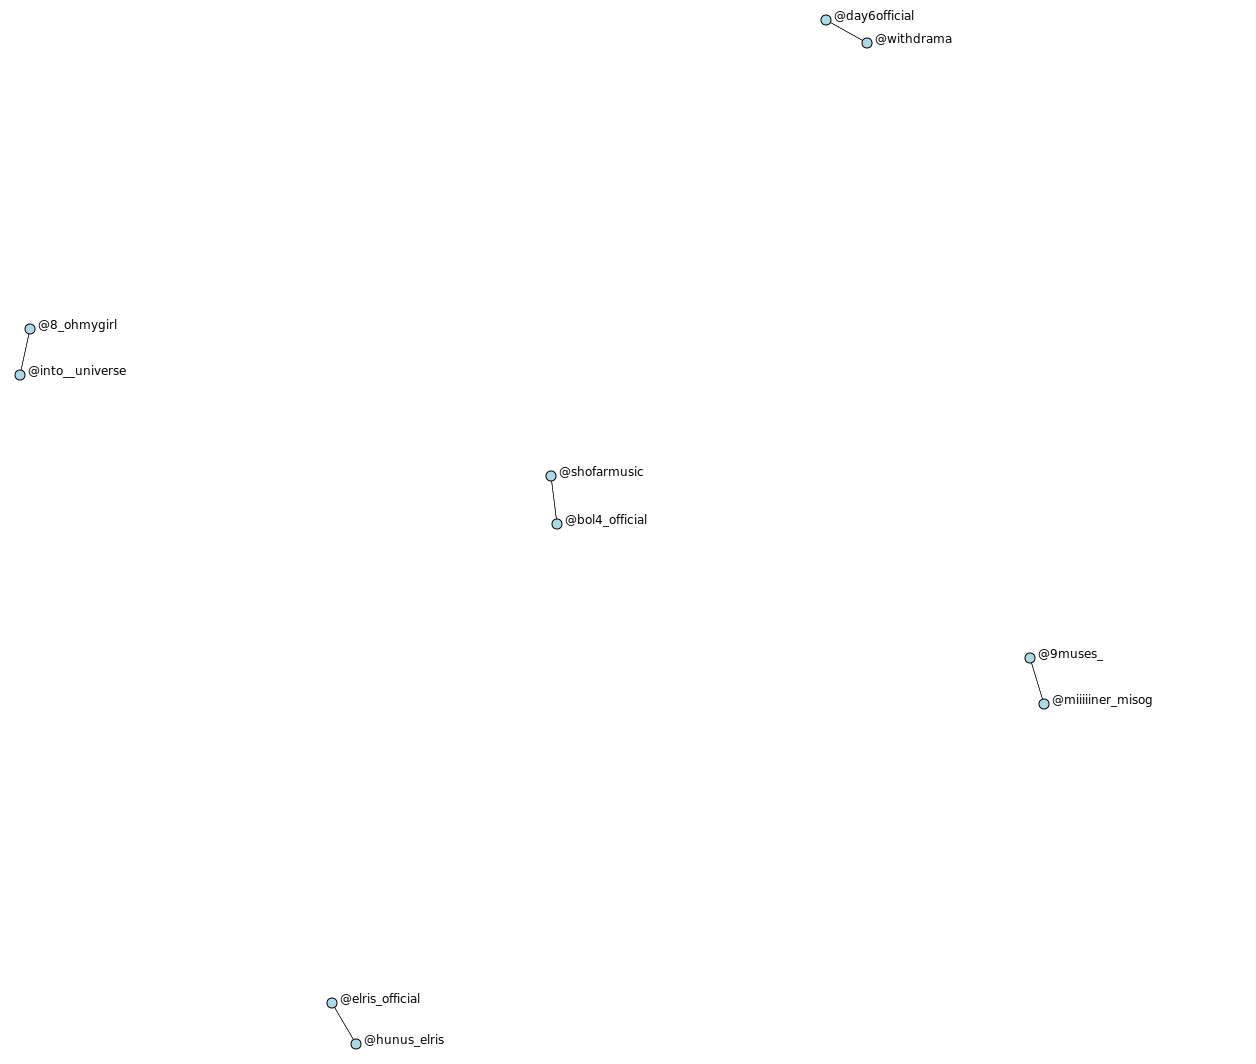

In [ ]:
draw_graph(G_corona, show_names=True, node_size=5, font_size=12) 

In [ ]:
corona_nodes = list(G_corona.nodes) 

corona_nodes  

['@withdrama',
 '@elris_official',
 '@day6official',
 '@hunus_elris',
 '@shofarmusic',
 '@miiiiiner_misog',
 '@9muses_',
 '@into__universe',
 '@8_ohmygirl',
 '@bol4_official']

['@haroobomkum' '@shxx131bi131' '@wei__official' '@shazam'
 '@blackpinkoffici' '@ddalgitokki29' '@bubblesmumblesd' '@bts_army'
 '@c_woodzofficial' '@jeff__benjamin' '@iheartradio' '@ateezofficial'
 '@yg_ikonic' '@spotifykrspotif' '@urbanzakapaabys' '@itzyofficial'
 '@coldplaybts_twt' '@wm_on7off' '@nctsmtown_dream' '@__honey_j__'
 '@officialhyolyn_' '@iheartradioaska' '@enhypen_members' '@g_i_dle'
 '@_weeekly' '@astro_staff' '@jypetwicejypetw' '@justinbieber' '@dprian_'
 '@kpopggsuperior' '@jaybumaom' '@weareoneexo' '@ygselect'
 '@mostrequestlive' '@bts_twtbts_bigh' '@_iuofficial' '@official_sunmi_'
 '@88rising' '@krungy21' '@halsey' '@twiceustan']


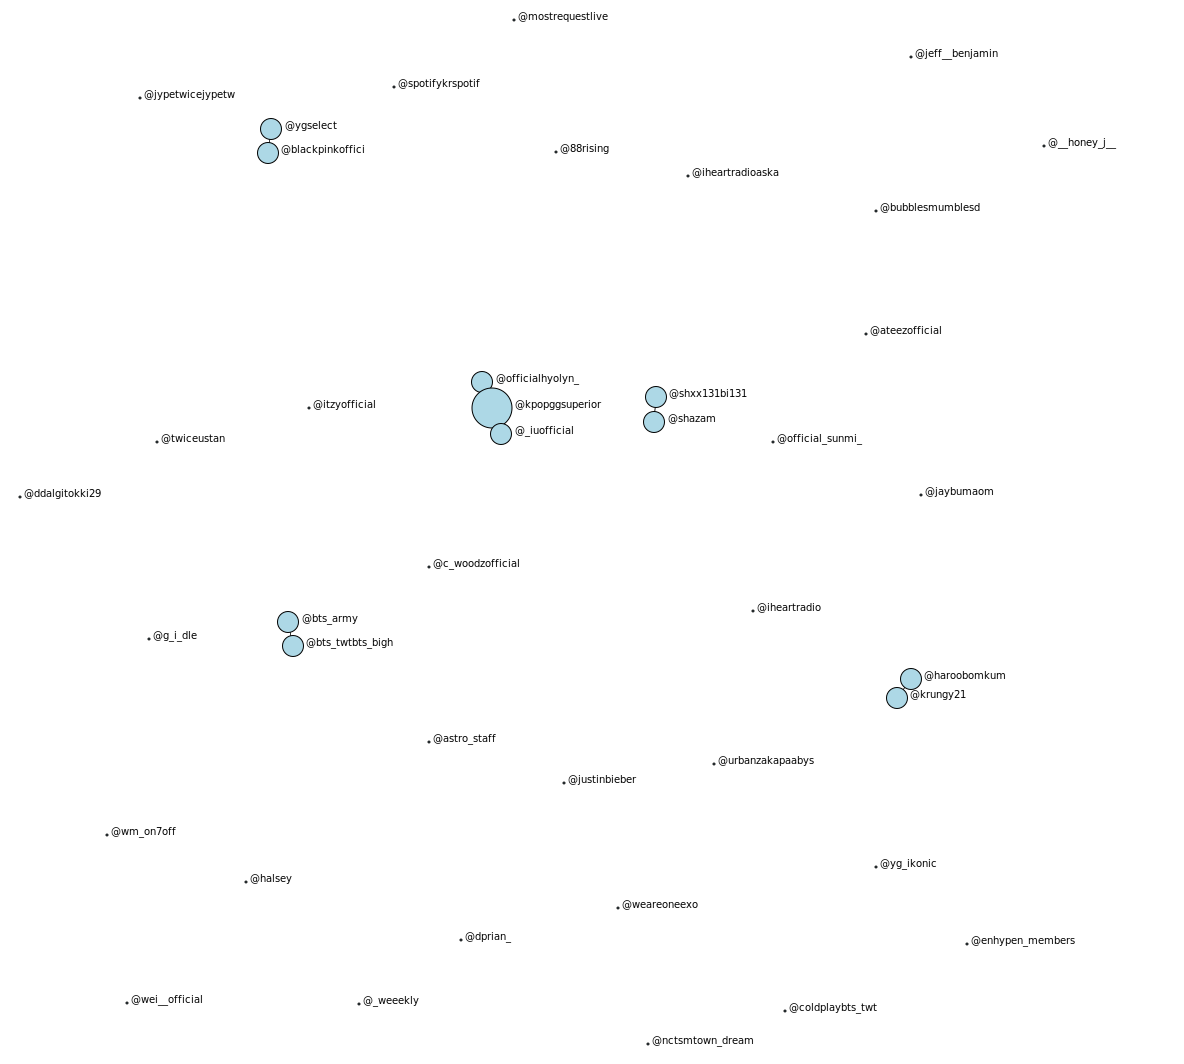

In [ ]:
G_corona = nx.k_corona(G, 2) 

draw_graph(G_corona, show_names=True, node_size=3) 